In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import itertools
import statsmodels.api as sm
import time

In [3]:
# Read the dataset from a text file
dataset_path = 'C:\\Users\\User\\STQD6024\\Assignment2_2023_data.txt'  # Replace with the actual path to your dataset file
data = pd.read_csv(dataset_path, header=None, sep=',')
data


,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,...,187.576,160,159,0.006065,0.000416,0.000,0,0.000,23,1
1,1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,...,234.505,170,169,0.005181,0.000403,2.247,0,0.000,23,1
2,1,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,...,211.442,1431,1427,0.006071,0.000474,10.656,1,0.178,23,1
3,1,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,...,220.230,94,92,0.004910,0.000320,0.000,0,0.000,23,1
4,1,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,...,225.162,117,114,0.004757,0.000380,18.182,1,13.318,23,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,40,5.127,0.000398,2.721,2.510,8.162,9.846,0.965,4.593,6.806,...,158.591,63,60,0.007766,0.001066,24.194,2,15.113,1,0
1036,40,1.757,0.000133,0.808,0.690,2.425,7.571,0.740,2.720,3.927,...,143.797,47,44,0.007561,0.000430,46.053,1,25.792,1,0
1037,40,2.912,0.000226,1.141,1.266,3.423,15.489,1.456,6.433,10.138,...,149.641,79,77,0.007767,0.000881,20.000,1,4.574,1,0
1038,40,3.788,0.000275,1.786,1.484,5.359,15.702,1.367,6.374,11.094,...,451.366,75,70,0.007257,0.001714,16.667,3,19.575,1,0


In [4]:
data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
dtype: int64

In [55]:
data.dtypes

Subject id                               int64
Jitter (local)                         float64
Jitter (local, absolute)               float64
Jitter (rap)                           float64
Jitter (ppq5)                          float64
Jitter (ddp)                           float64
Shimmer (local)                        float64
Shimmer (local, dB)                    float64
Shimmer (apq3)                         float64
Shimmer (apq5)                         float64
Shimmer (apq11)                        float64
Shimmer (dda)                          float64
AC                                     float64
NTH                                    float64
HTN                                    float64
Median pitch                           float64
16                                     float64
Standard deviation                     float64
Minimum pitch                          float64
Maximum pitch                          float64
Number of pulses                         int64
Number of per

In [4]:
# rename column names

data.rename(columns={ data.columns[0]: "Subject id", data.columns[1]: "Jitter (local)",data.columns[2]: "Jitter (local, absolute)",
                    data.columns[3]: "Jitter (rap)", data.columns[4]: "Jitter (ppq5)", data.columns[5]: "Jitter (ddp)",
                    data.columns[6]: "Shimmer (local)", data.columns[7]: "Shimmer (local, dB)", data.columns[8]: "Shimmer (apq3)", 
                    data.columns[9]: "Shimmer (apq5)", data.columns[10]: "Shimmer (apq11)",data.columns[11]: "Shimmer (dda)",
                    data.columns[12]: "AC", data.columns[13]: "NTH", data.columns[14]: "HTN",
                    data.columns[15]: "Median pitch",data.columns[28]:"Mean pitch" , data.columns[17]: "Standard deviation", data.columns[18]: "Minimum pitch",
                    data.columns[19]: "Maximum pitch", data.columns[20]: "Number of pulses",data.columns[21]: "Number of periods",
                    data.columns[22]: "Mean period", data.columns[23]: "Standard deviation of period", data.columns[24]: "Fraction of locally unvoiced frames",
                    data.columns[25]: "Number of voice breaks", data.columns[26]: "Degree of voice breaks", data.columns[27]: "UPDRS score", 
                    data.columns[28]:"class information"}, inplace=True)

data

,Subject id,Jitter (local),"Jitter (local, absolute)",Jitter (rap),Jitter (ppq5),Jitter (ddp),Shimmer (local),"Shimmer (local, dB)",Shimmer (apq3),Shimmer (apq5),...,Maximum pitch,Number of pulses,Number of periods,Mean period,Standard deviation of period,Fraction of locally unvoiced frames,Number of voice breaks,Degree of voice breaks,UPDRS score,class information
0,1,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,...,187.576,160,159,0.006065,0.000416,0.000,0,0.000,23,1
1,1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,...,234.505,170,169,0.005181,0.000403,2.247,0,0.000,23,1
2,1,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,...,211.442,1431,1427,0.006071,0.000474,10.656,1,0.178,23,1
3,1,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,...,220.230,94,92,0.004910,0.000320,0.000,0,0.000,23,1
4,1,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,...,225.162,117,114,0.004757,0.000380,18.182,1,13.318,23,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,40,5.127,0.000398,2.721,2.510,8.162,9.846,0.965,4.593,6.806,...,158.591,63,60,0.007766,0.001066,24.194,2,15.113,1,0
1036,40,1.757,0.000133,0.808,0.690,2.425,7.571,0.740,2.720,3.927,...,143.797,47,44,0.007561,0.000430,46.053,1,25.792,1,0
1037,40,2.912,0.000226,1.141,1.266,3.423,15.489,1.456,6.433,10.138,...,149.641,79,77,0.007767,0.000881,20.000,1,4.574,1,0
1038,40,3.788,0.000275,1.786,1.484,5.359,15.702,1.367,6.374,11.094,...,451.366,75,70,0.007257,0.001714,16.667,3,19.575,1,0


### assignment correction

In [5]:
# Get dummy variables
#dummies = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

# Extract independent variable
#y = data.iloc[:, 27] 
y = pd.DataFrame(data["UPDRS score"])

# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
X = data.drop(['UPDRS score', 'class information', 'Subject id'], axis=1).astype('float64')

# Define the feature set X.
#X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X.dtypes

Jitter (local)                         float64
Jitter (local, absolute)               float64
Jitter (rap)                           float64
Jitter (ppq5)                          float64
Jitter (ddp)                           float64
Shimmer (local)                        float64
Shimmer (local, dB)                    float64
Shimmer (apq3)                         float64
Shimmer (apq5)                         float64
Shimmer (apq11)                        float64
Shimmer (dda)                          float64
AC                                     float64
NTH                                    float64
HTN                                    float64
Median pitch                           float64
16                                     float64
Standard deviation                     float64
Minimum pitch                          float64
Maximum pitch                          float64
Number of pulses                       float64
Number of periods                      float64
Mean period  

In [6]:
y

,UPDRS score
0,23
1,23
2,23
3,23
4,23
...,...
1035,1
1036,1
1037,1
1038,1


In [7]:
np.random.seed(seed=12)
train = np.random.choice([True, False], size = len(y), replace = True)
test = np.invert(train)


In [8]:
def processSubset(feature_set, X_train, y_train, X_test, y_test):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y_train,X_train[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X_test[list(feature_set)]) - y_test) ** 2).sum()
    return {"model":regr, "RSS":RSS}

## forward selection method

In [9]:
def forward(predictors, X_train, y_train, X_test, y_test):
    
    results = []

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X_train.columns if p not in predictors]
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p], X_train, y_train, X_test, y_test))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
        
    # Return the best model, along with some other useful information about the model
    return best_model

#### testing model using train data

In [10]:
models_train = pd.DataFrame(columns=["RSS", "model"])

predictors = []

for i in range(1,len(X.columns)+1):    
    models_train.loc[i] = forward(predictors, X[train], y[train]["UPDRS score"], X[test], y[test]["UPDRS score"])
    predictors = models_train.loc[i]["model"].model.exog_names

In [13]:
models_train.dtypes

RSS      object
model    object
dtype: object

In [14]:
models_train

,RSS,model
1,131151.778631,<statsmodels.regression.linear_model.Regressio...
2,126268.815874,<statsmodels.regression.linear_model.Regressio...
3,123298.119762,<statsmodels.regression.linear_model.Regressio...
4,120857.70734,<statsmodels.regression.linear_model.Regressio...
5,119462.441125,<statsmodels.regression.linear_model.Regressio...
6,118891.988475,<statsmodels.regression.linear_model.Regressio...
7,118217.167977,<statsmodels.regression.linear_model.Regressio...
8,117469.598595,<statsmodels.regression.linear_model.Regressio...
9,116878.460013,<statsmodels.regression.linear_model.Regressio...
10,116589.791119,<statsmodels.regression.linear_model.Regressio...


In [11]:
models_train["RSS"] = models_train["RSS"].astype('float')

# due to the dtype is object, I personally change it to float since RSS is numeric output

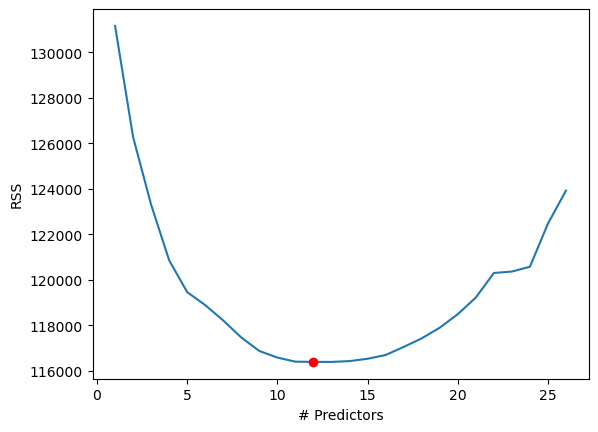

In [12]:
plt.plot(models_train["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')
plt.plot(models_train["RSS"].argmin(), models_train["RSS"].min(), "or")

#### testing model using test data

+ we see that in train data, the best model (according to validation set approach) is the one that contains 15 predictors
+ now that we know,  let's perform best subset selection on the full dataset and select the best 15-predictor model.
+ We perform this selection on the full data set and select the best 15-predictor model, rather than simply using the predictors that we obtained from the training set, because the best 15-predictor model on the full data set may differ from the corresponding model on the training set.

In [13]:
models_test = pd.DataFrame(columns=["RSS", "model"])

predictors = []

for i in range(1,15):    
    models_test.loc[i] = forward(predictors, X[test], y[test]["UPDRS score"], X[test], y[test]["UPDRS score"])
    predictors = models_test.loc[i]["model"].model.exog_names

In [14]:
models_test["RSS"] = models_test["RSS"].astype("float")

In [19]:
models_test.dtypes

RSS      float64
model     object
dtype: object

In [15]:
models_test

,RSS,model
1,131067.471904,<statsmodels.regression.linear_model.Regressio...
2,126141.589957,<statsmodels.regression.linear_model.Regressio...
3,123010.316233,<statsmodels.regression.linear_model.Regressio...
4,119988.248075,<statsmodels.regression.linear_model.Regressio...
5,118502.868451,<statsmodels.regression.linear_model.Regressio...
6,117181.587727,<statsmodels.regression.linear_model.Regressio...
7,116045.172305,<statsmodels.regression.linear_model.Regressio...
8,115210.050312,<statsmodels.regression.linear_model.Regressio...
9,114162.595288,<statsmodels.regression.linear_model.Regressio...
10,113803.111088,<statsmodels.regression.linear_model.Regressio...


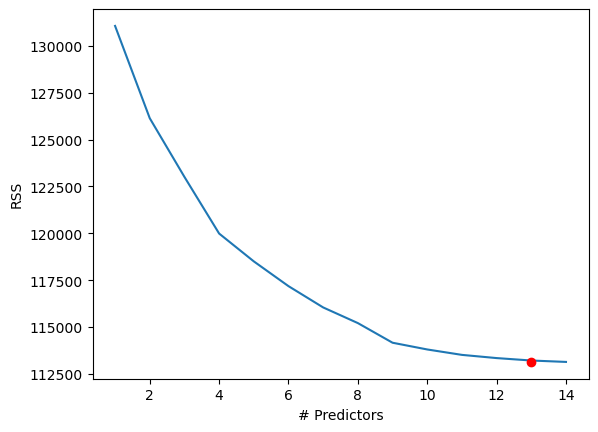

In [16]:
plt.plot(models_test["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')
plt.plot(models_test["RSS"].argmin(), models_test["RSS"].min(), "or")

In [17]:
print(models_train.loc[14, "model"].model.exog_names)
print(models_test.loc[14, "model"].model.exog_names)

['Shimmer (apq11)', 'HTN', 'Jitter (local, absolute)', 'NTH', 'Jitter (rap)', 'Shimmer (local, dB)', 'Degree of voice breaks', 'Number of periods', 'Fraction of locally unvoiced frames', 'Number of pulses', 'Shimmer (dda)', 'AC', 'Median pitch', 16]
['Shimmer (apq11)', 'HTN', 'Jitter (local, absolute)', 'Degree of voice breaks', 'NTH', 'Jitter (rap)', 'Shimmer (local, dB)', 'Number of periods', 'Fraction of locally unvoiced frames', 'Shimmer (apq3)', 'Shimmer (local)', 'Number of voice breaks', 'Jitter (ppq5)', 'Shimmer (apq5)']


In [18]:
print(models_train.loc[13,"model"].summary())
print(models_test.loc[13,"model"].summary())

                                 OLS Regression Results                                
Dep. Variable:            UPDRS score   R-squared (uncentered):                   0.471
Model:                            OLS   Adj. R-squared (uncentered):              0.457
Method:                 Least Squares   F-statistic:                              34.15
Date:                Tue, 30 May 2023   Prob (F-statistic):                    1.12e-60
Time:                        12:36:57   Log-Likelihood:                         -2112.4
No. Observations:                 511   AIC:                                      4251.
Df Residuals:                     498   BIC:                                      4306.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                                          coef    std err          t      P>|t|      [0.025      0.975]
----------------

Text(0, 0.5, 'BIC')

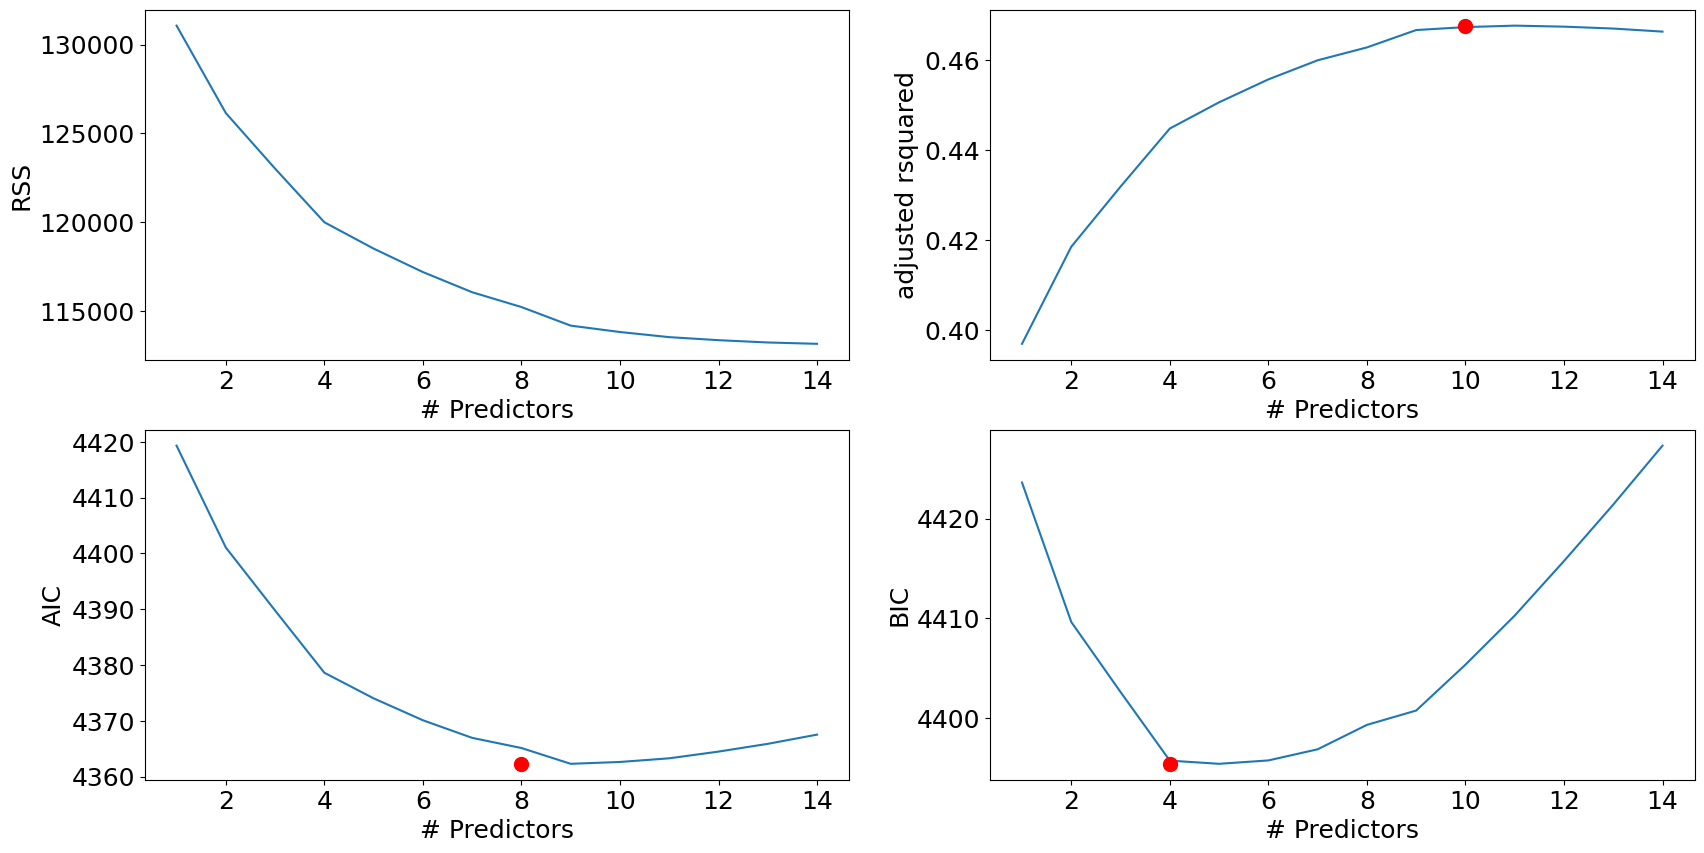

In [19]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

# Set up a 2x2 grid so we can look at 4 plots at once
plt.subplot(2, 2, 1)

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector
plt.plot(models_test["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector

rsquared_adj = models_test.apply(lambda row: row[1].rsquared_adj, axis=1)

plt.subplot(2, 2, 2)
plt.plot(rsquared_adj)
plt.plot(rsquared_adj.argmax(), rsquared_adj.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
aic = models_test.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

bic = models_test.apply(lambda row: row[1].bic, axis=1)

plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('BIC')

In [20]:
models_train["RSS"]


1     131151.778631
2     126268.815874
3     123298.119762
4     120857.707340
5     119462.441125
6     118891.988475
7     118217.167977
8     117469.598595
9     116878.460013
10    116589.791119
11    116409.844934
12    116402.931241
13    116399.275240
14    116435.207129
15    116538.272429
16    116703.035615
17    117056.258499
18    117433.667239
19    117901.744142
20    118495.050732
21    119224.725691
22    120303.843844
23    120367.163649
24    120578.051271
25    122472.958545
26    123922.005604
Name: RSS, dtype: float64

In [23]:
# Get dummy variables if needed
# dummies = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

# Extract independent variable
y = pd.DataFrame(data["UPDRS score"])

# Drop the column with the independent variable (UPDRS score), and columns for which we created dummy variables
X = data.drop(['UPDRS score', 'class information', 'Subject id'], axis=1).astype('float64')

# Define the feature set X.
# X = pd.concat([X, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

# Fit model on the entire dataset
model = sm.OLS(y, X)
regr = model.fit()

# Get the predicted values for all data
y_pred = regr.predict(X)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y, y_pred)


# Calculate R-squared
#r_squared = r2_score(y, y_pred)

# Print the results
print("full dataset Mean Squared Error (MSE):", mse)
#print("R-squared:", r_squared)


full dataset Mean Squared Error (MSE): 219.03723175289304


In [31]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model on the train data
model = sm.OLS(y_train, X_train)
regr = model.fit()

# Get the predicted values for train and test data
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

# Calculate MSE for train and test data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Print the results
print("Mean Squared Error (MSE) - Train Data:", mse_train)
print("Mean Squared Error (MSE) - Test Data:", mse_test)


Mean Squared Error (MSE) - Train Data: 221.15661410980402
Mean Squared Error (MSE) - Test Data: 213.69203730240528


In [28]:
models_all = pd.DataFrame(columns=["RSS", "model"])

predictors = []

for i in range(1,15):    
    models_all.loc[i] = forward(predictors, X, y["UPDRS score"], X, y["UPDRS score"])
    predictors = models_all.loc[i]["model"].model.exog_names
    


In [29]:
models_all["RSS"] = models_all["RSS"].astype("float")

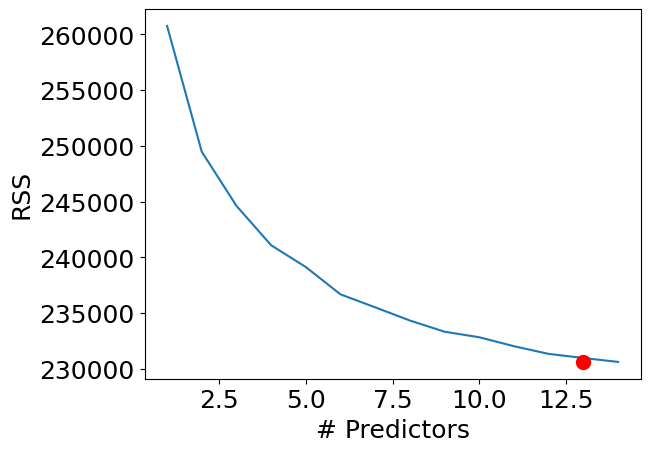

In [30]:
plt.plot(models_all["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')
plt.plot(models_all["RSS"].argmin(), models_all["RSS"].min(), "or")

## cross-validation

In [31]:
k = 10        # number of folds
np.random.seed(seed=1)
folds = np.random.choice(k, size = len(y), replace = True)

# Create a DataFrame to store the results of our upcoming calculations
cv_errors = pd.DataFrame(columns=range(1,k+1), index=range(1,20))
cv_errors = cv_errors.fillna(0)

In [33]:
models_cv = pd.DataFrame(columns=["RSS", "model"])
    
# Outer loop iterates over all folds
for j in range(1,k+1):

    # Reset predictors
    predictors = []
    
    # Inner loop iterates over each size i
    for i in range(1,len(X.columns)+1):    
    
        # The perform forward selection on the full dataset minus the jth fold, test on jth fold
        models_cv.loc[i] = forward(predictors, X[folds != (j-1)], y[folds != (j-1)]["UPDRS score"], X[folds == (j-1)], y[folds == (j-1)]["UPDRS score"])
        
        # Save the cross-validated error for this fold
        cv_errors[j][i] = models_cv.loc[i]["RSS"]

        # Extract the predictors
        predictors = models_cv.loc[i]["model"].model.exog_names
        

C:\Users\User\AppData\Local\Temp\ipykernel_980\2324352560.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv_errors[j][i] = models_cv.loc[i]["RSS"]
C:\Users\User\AppData\Local\Temp\ipykernel_980\2324352560.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv_errors[j][i] = models_cv.loc[i]["RSS"]
C:\Users\User\AppData\Local\Temp\ipykernel_980\2324352560.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv_errors[j][i] = mode

C:\Users\User\AppData\Local\Temp\ipykernel_980\2324352560.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv_errors[j][i] = models_cv.loc[i]["RSS"]
C:\Users\User\AppData\Local\Temp\ipykernel_980\2324352560.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv_errors[j][i] = models_cv.loc[i]["RSS"]
C:\Users\User\AppData\Local\Temp\ipykernel_980\2324352560.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv_errors[j][i] = mode

C:\Users\User\AppData\Local\Temp\ipykernel_980\2324352560.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv_errors[j][i] = models_cv.loc[i]["RSS"]
C:\Users\User\AppData\Local\Temp\ipykernel_980\2324352560.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv_errors[j][i] = models_cv.loc[i]["RSS"]
C:\Users\User\AppData\Local\Temp\ipykernel_980\2324352560.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv_errors[j][i] = mode

In [34]:
cv_errors

,1,2,3,4,5,6,7,8,9,10
1,28757.735295,22822.479509,24275.391993,22576.846660,22000.786865,27874.175494,29377.500985,23757.657695,24249.337581,25398.185102
2,27790.095753,21881.426211,22769.277346,22014.539939,21596.091815,26854.681290,28235.140087,23284.784184,23756.197261,23679.242444
3,27110.765216,21204.957364,22564.782671,21313.212235,20826.570580,25792.273289,27059.443899,21765.546382,23482.091985,23230.352319
4,26927.428459,20973.631721,22348.503958,21226.666848,19881.564044,25235.024700,26562.586222,20901.574491,23414.026688,23205.306009
5,26718.985650,20807.561020,22021.712600,21094.553972,19598.918626,24318.125440,26097.502470,20511.667012,23416.502587,23183.435194
6,26595.980876,20621.144446,21848.187178,21045.495579,19498.969318,23358.127786,25569.571048,20477.556210,23406.653052,23168.814614
7,26577.178351,20388.825148,21703.922271,21043.215445,19510.377594,23376.521353,25308.095695,20433.889005,23492.966004,22958.519519
8,26560.127438,20284.046530,21363.773876,21061.479570,19569.502905,23416.620483,25207.109661,20404.467819,23498.123301,22037.193570
9,26482.429600,20208.556790,21296.005722,20845.966698,19646.230425,23462.400205,25102.520214,20389.329922,23533.144127,21854.071897
10,26290.791983,20171.884262,21220.747734,20871.824928,19720.900439,23426.719082,25037.612135,20382.185746,23300.222395,21726.920623


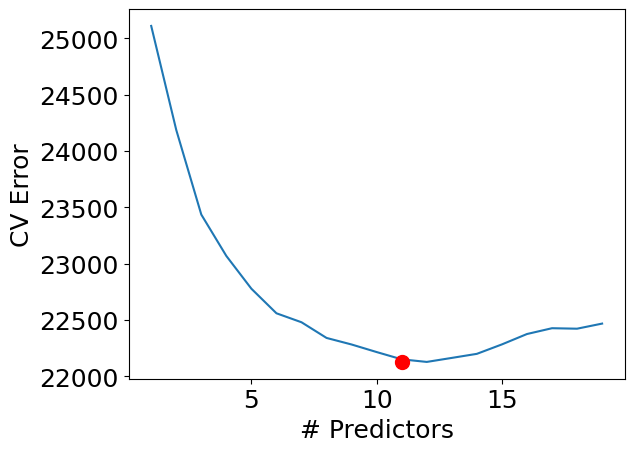

In [35]:
cv_mean = cv_errors.apply(np.mean, axis=1)

plt.plot(cv_mean)
plt.xlabel('# Predictors')
plt.ylabel('CV Error')
plt.plot(cv_mean.argmin(), cv_mean.min(), "or")

In [36]:
print(models_cv.loc[9, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:            UPDRS score   R-squared (uncentered):                   0.452
Model:                            OLS   Adj. R-squared (uncentered):              0.447
Method:                 Least Squares   F-statistic:                              84.99
Date:                Sun, 28 May 2023   Prob (F-statistic):                   8.49e-115
Time:                        16:36:03   Log-Likelihood:                         -3876.7
No. Observations:                 937   AIC:                                      7771.
Df Residuals:                     928   BIC:                                      7815.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

Text(0, 0.5, 'BIC')

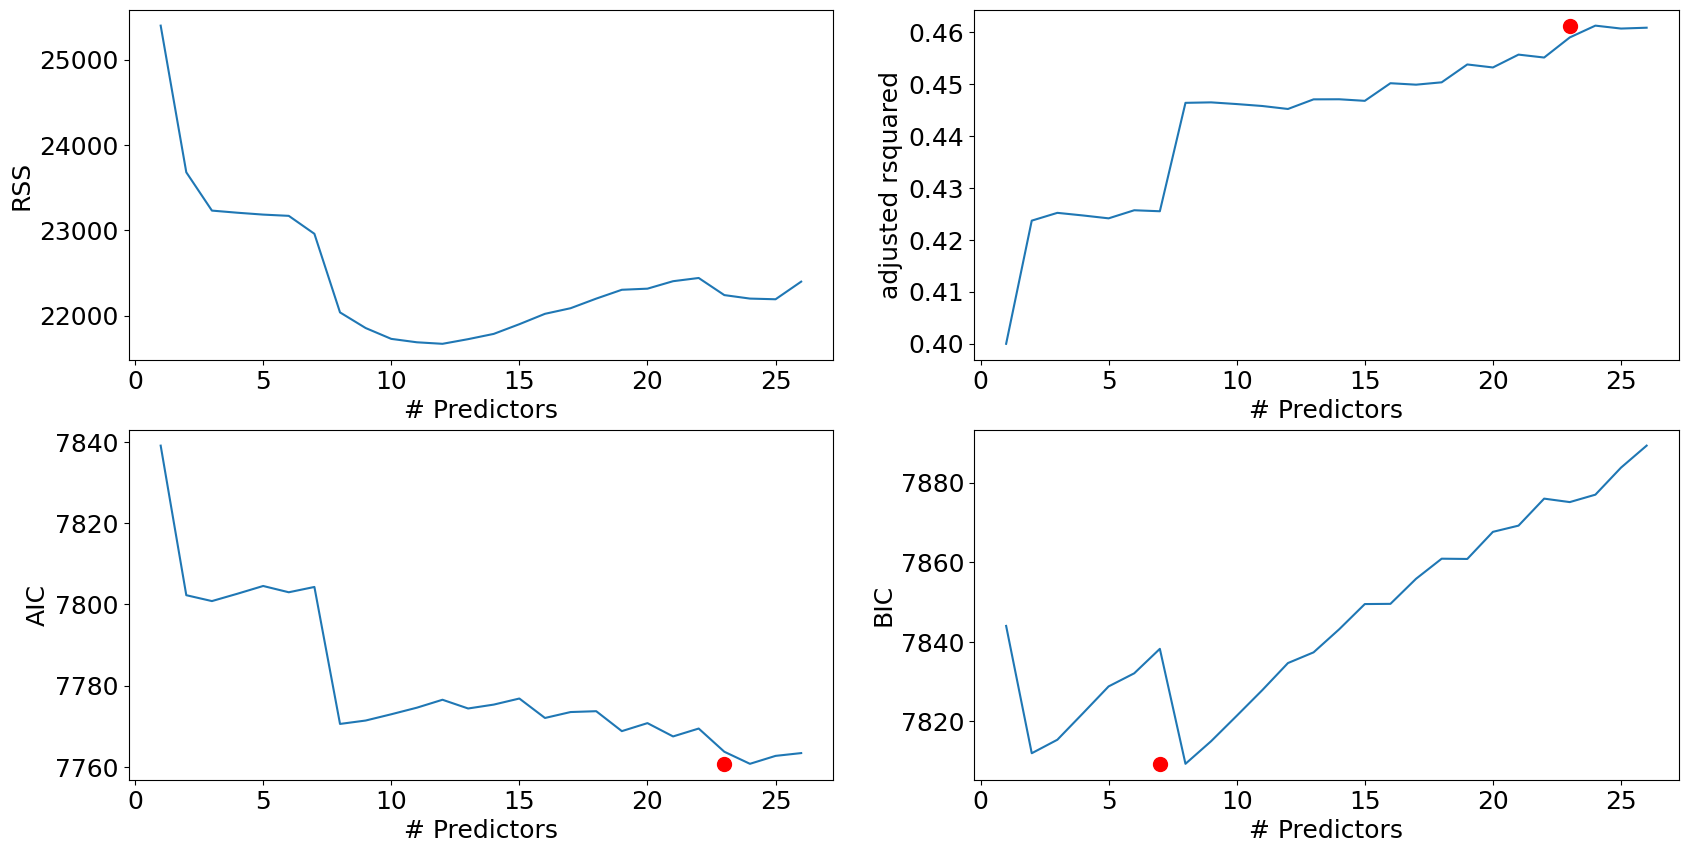

In [37]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

# Set up a 2x2 grid so we can look at 4 plots at once
plt.subplot(2, 2, 1)

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector
plt.plot(models_cv["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector

rsquared_adj = models_cv.apply(lambda row: row[1].rsquared_adj, axis=1)

plt.subplot(2, 2, 2)
plt.plot(rsquared_adj)
plt.plot(rsquared_adj.argmax(), rsquared_adj.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
aic = models_cv.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

bic = models_cv.apply(lambda row: row[1].bic, axis=1)

plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('BIC')

### old work : Standard MLR (better dont use it) 

In [22]:
# Step 1: Split the dataset into training and test sets
X = data.iloc[:, 1:27]  # Features
y = data.iloc[:, 27]    # UPDRS scores
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y


0       23
1       23
2       23
3       23
4       23
        ..
1035     1
1036     1
1037     1
1038     1
1039     1
Name: 27, Length: 1040, dtype: int64

In [ ]:
np.random.seed(seed=12)
train = np.random.choice([True, False], size = len(y), replace = True)
test = np.invert(train)

In [7]:
def processSubset(feature_set, X_train, y_train, X_test, y_test):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y_train,X_train[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X_test[list(feature_set)]) - y_test) ** 2).sum()
    return {"model":regr, "RSS":RSS}

In [14]:
# Step 2: Train the MLR model
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

# Step 3: Evaluate the model
y_pred = mlr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r_squared = mlr_model.score(X_test, y_test)


C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [15]:
print(f"MSE: {mse}")
print(f"R-squred: {r_squared}")

# this is the standard MLR model

MSE: 214.1882036952211
R-squred: 0.12217816256772718



Here are a few possible approaches or variations to consider when building an MLR model:

Standard MLR: This is the basic approach where you fit a linear regression model using all the available features as independent variables.

Stepwise Regression: Stepwise regression is a method where you select the most significant independent variables for inclusion in the model. It involves a combination of forward selection (adding significant variables one by one) and backward elimination (removing non-significant variables one by one).

Regularized Regression: Regularized regression methods, such as Ridge regression and Lasso regression, are used to address potential issues like overfitting and multicollinearity. These methods introduce penalty terms to the regression model, encouraging simpler and more stable models.

Polynomial Regression: Polynomial regression is an extension of MLR that allows for modeling nonlinear relationships between the independent variables and the dependent variable. It involves adding polynomial terms (squared, cubic, etc.) to the model to capture nonlinear patterns.

Subset Selection: Subset selection techniques involve evaluating all possible subsets of independent variables and selecting the subset that results in the best model performance based on some evaluation criterion, such as adjusted R-squared or AIC (Akaike Information Criterion).

Principal Component Regression (PCR): PCR combines principal component analysis (PCA) with MLR. It first reduces the dimensionality of the feature space using PCA and then applies MLR on the reduced set of principal components.

Partial Least Squares (PLS) Regression: PLS regression is another dimensionality reduction technique that combines the features into a set of orthogonal components. It seeks to maximize the covariance between the components and the dependent variable.

These are some common variations of MLR models. The choice of the best MLR model depends on the specific characteristics of your dataset, the assumptions you want to make, and the performance criteria you are optimizing for (e.g., predictive accuracy, interpretability, simplicity). It is recommended to experiment with different approaches and evaluate their performance using appropriate metrics or cross-validation techniques to determine the most suitable model for your dataset.

#stepwise regression

#import pandas as pd
#import statsmodels.api as sm
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import mean_squared_error

# Step 1: Load the dataset
#dataset_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/<your-dataset>.data'  # Replace with the actual dataset URL
#data = pd.read_csv(dataset_url, header=None)

# Step 2: Preprocess the data (handle missing values, scale/encode features, etc.)

# Step 3: Split the dataset into training and test sets
#X = data.iloc[:, 1:27]  # Features
#y = data.iloc[:, 28]    # UPDRS scores
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Perform stepwise regression
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()  # Fit the initial model with all features
selected_features = model.summary().tables[1]  # Get the summary table of the model
selected_features = pd.DataFrame(selected_features.data)
selected_features.columns = selected_features.iloc[0]
selected_features = selected_features.iloc[1:]  # Exclude the header row

# Step 5: Train the final MLR model with selected features
selected_feature_names = selected_features['Unnamed: 0'].tolist()
X_train_selected = X_train[selected_feature_names]
final_model = sm.OLS(y_train, sm.add_constant(X_train_selected)).fit()

# Step 6: Evaluate the model
X_test_selected = X_test[selected_feature_names]
y_pred = final_model.predict(sm.add_constant(X_test_selected))
mse = mean_squared_error(y_test, y_pred)
r_squared = final_model.rsquared
print(f"MSE: {mse}")
print(f"R-squared: {r_squared}")


### best selction approach

In [35]:
def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y,X[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X[list(feature_set)]) - y) ** 2).sum()
    return {"model":regr, "RSS":RSS}

# Step 1: Split the dataset into training and test sets
#X = data.iloc[:, 0:26]  # Features
#y = data.iloc[:, 26]    # UPDRS scores
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
def getBest(k):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [41]:
# Could take quite awhile to complete...

models_best = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
for i in range(1,6):
    models_best.loc[i] = getBest(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed 26 models on 1 predictors in 0.7497575283050537 seconds.
Processed 325 models on 2 predictors in 293.68238520622253 seconds.
Processed 2600 models on 3 predictors in 5.118347406387329 seconds.
Processed 14950 models on 4 predictors in 33.595864057540894 seconds.
Processed 65780 models on 5 predictors in 384.77990221977234 seconds.
Total elapsed time: 809.5002059936523 seconds.


In [42]:
models_best

# as predicted, the more the predictors, the lower the RSS

,RSS,model
1,121671.995122,<statsmodels.regression.linear_model.Regressio...
2,87763.365821,<statsmodels.regression.linear_model.Regressio...
3,87313.303033,<statsmodels.regression.linear_model.Regressio...
4,86433.671335,<statsmodels.regression.linear_model.Regressio...
5,85021.486885,<statsmodels.regression.linear_model.Regressio...


In [44]:
print(models_best.loc[1, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:            UPDRS score   R-squared (uncentered):                   0.694
Model:                            OLS   Adj. R-squared (uncentered):              0.694
Method:                 Least Squares   F-statistic:                              2360.
Date:                Wed, 24 May 2023   Prob (F-statistic):                   1.25e-269
Time:                        22:35:25   Log-Likelihood:                         -3952.0
No. Observations:                1040   AIC:                                      7906.
Df Residuals:                    1039   BIC:                                      7911.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [52]:
print(models_best.loc[2, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:            UPDRS score   R-squared (uncentered):                   0.779
Model:                            OLS   Adj. R-squared (uncentered):              0.779
Method:                 Least Squares   F-statistic:                              1835.
Date:                Wed, 24 May 2023   Prob (F-statistic):                        0.00
Time:                        22:39:08   Log-Likelihood:                         -3782.1
No. Observations:                1040   AIC:                                      7568.
Df Residuals:                    1038   BIC:                                      7578.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [53]:
print(models_best.loc[3, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:            UPDRS score   R-squared (uncentered):                   0.781
Model:                            OLS   Adj. R-squared (uncentered):              0.780
Method:                 Least Squares   F-statistic:                              1230.
Date:                Wed, 24 May 2023   Prob (F-statistic):                        0.00
Time:                        22:39:10   Log-Likelihood:                         -3779.4
No. Observations:                1040   AIC:                                      7565.
Df Residuals:                    1037   BIC:                                      7580.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [49]:
print(models_best.loc[4, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:            UPDRS score   R-squared (uncentered):                   0.783
Model:                            OLS   Adj. R-squared (uncentered):              0.782
Method:                 Least Squares   F-statistic:                              933.6
Date:                Wed, 24 May 2023   Prob (F-statistic):                        0.00
Time:                        22:38:36   Log-Likelihood:                         -3774.2
No. Observations:                1040   AIC:                                      7556.
Df Residuals:                    1036   BIC:                                      7576.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [50]:
print(models_best.loc[5, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:            UPDRS score   R-squared (uncentered):                   0.786
Model:                            OLS   Adj. R-squared (uncentered):              0.785
Method:                 Least Squares   F-statistic:                              762.0
Date:                Wed, 24 May 2023   Prob (F-statistic):                        0.00
Time:                        22:38:39   Log-Likelihood:                         -3765.6
No. Observations:                1040   AIC:                                      7541.
Df Residuals:                    1035   BIC:                                      7566.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [57]:
print("R-squared for 1 predictor : ", models_best.loc[1, "model"].rsquared)
print("R-squared for 2 predictor : ",models_best.loc[2, "model"].rsquared)
print("R-squared for 3 predictor : ",models_best.loc[3, "model"].rsquared)
print("R-squared for 4 predictor : ",models_best.loc[4, "model"].rsquared)
print("R-squared for 5 predictor : ",models_best.loc[5, "model"].rsquared)

R-squared for 1 predictor :  0.6942821188883626
R-squared for 2 predictor :  0.7794822858702304
R-squared for 3 predictor :  0.7806131314830185
R-squared for 4 predictor :  0.782823328979142
R-squared for 5 predictor :  0.7863716396415692


In [58]:
# Show the best 25 variable model (there's actually only one)
print(getBest(25)["model"].summary())

Processed 26 models on 25 predictors in 0.2295684814453125 seconds.
                                 OLS Regression Results                                
Dep. Variable:            UPDRS score   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.793
Method:                 Least Squares   F-statistic:                              160.1
Date:                Wed, 24 May 2023   Prob (F-statistic):                        0.00
Time:                        22:48:18   Log-Likelihood:                         -3737.4
No. Observations:                1040   AIC:                                      7525.
Df Residuals:                    1015   BIC:                                      7648.
Df Model:                          25                                                  
Covariance Type:            nonrobust                                                  
                                          coef    st

Text(0, 0.5, 'BIC')

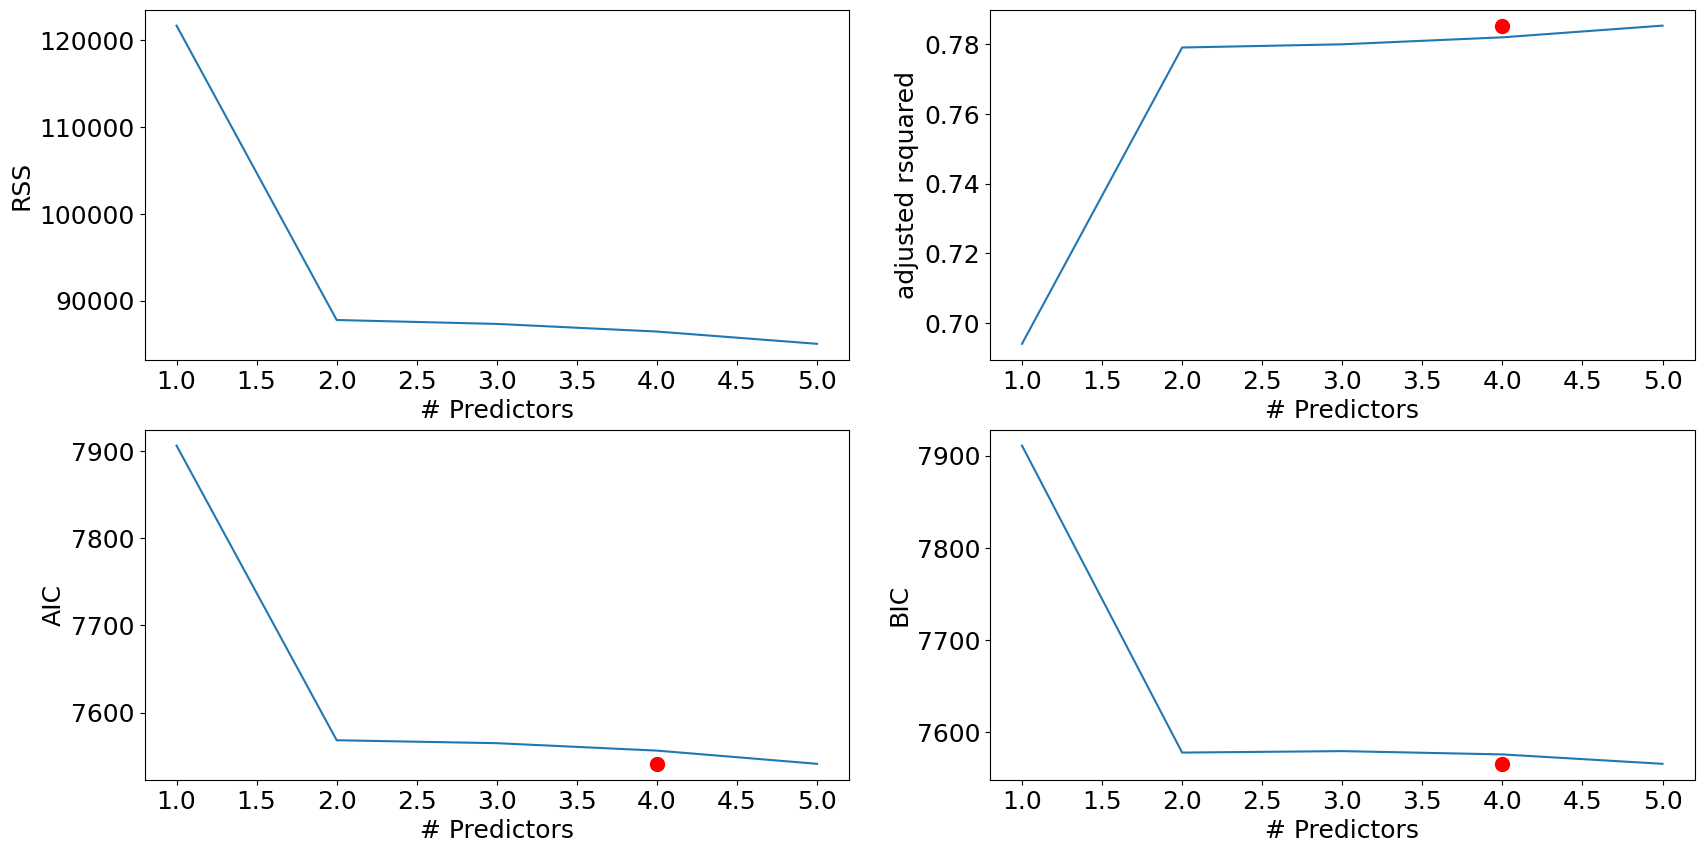

In [59]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

# Set up a 2x2 grid so we can look at 4 plots at once
plt.subplot(2, 2, 1)

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector
plt.plot(models_best["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector

rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

plt.subplot(2, 2, 2)
plt.plot(rsquared_adj)
plt.plot(rsquared_adj.argmax(), rsquared_adj.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
aic = models_best.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

bic = models_best.apply(lambda row: row[1].bic, axis=1)

plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('BIC')

### forward selection

In [60]:
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [63]:
models_fwd = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
predictors = []

for i in range(1,len(X.columns)+1):    
    models_fwd.loc[i] = forward(predictors)
    predictors = models_fwd.loc[i]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  26 models on 1 predictors in 0.06539344787597656 seconds.
Processed  25 models on 2 predictors in 0.050661325454711914 seconds.
Processed  24 models on 3 predictors in 0.04755115509033203 seconds.
Processed  23 models on 4 predictors in 0.04973721504211426 seconds.
Processed  22 models on 5 predictors in 0.04599261283874512 seconds.
Processed  21 models on 6 predictors in 0.058640480041503906 seconds.
Processed  20 models on 7 predictors in 0.047432899475097656 seconds.
Processed  19 models on 8 predictors in 0.047510385513305664 seconds.
Processed  18 models on 9 predictors in 0.05000448226928711 seconds.
Processed  17 models on 10 predictors in 0.0485076904296875 seconds.
Processed  16 models on 11 predictors in 0.051004648208618164 seconds.
Processed  15 models on 12 predictors in 0.05251884460449219 seconds.
Processed  14 models on 13 predictors in 0.05471968650817871 seconds.
Processed  13 models on 14 predictors in 0.05187249183654785 seconds.
Processed  12 models on 1

In [66]:
models_fwd 

,RSS,model
1,121671.995122,<statsmodels.regression.linear_model.Regressio...
2,87763.365821,<statsmodels.regression.linear_model.Regressio...
3,87313.303033,<statsmodels.regression.linear_model.Regressio...
4,86433.671335,<statsmodels.regression.linear_model.Regressio...
5,85021.486885,<statsmodels.regression.linear_model.Regressio...
6,83947.908363,<statsmodels.regression.linear_model.Regressio...
7,83494.994062,<statsmodels.regression.linear_model.Regressio...
8,82886.284073,<statsmodels.regression.linear_model.Regressio...
9,82402.906001,<statsmodels.regression.linear_model.Regressio...
10,82119.442828,<statsmodels.regression.linear_model.Regressio...


In [70]:
print(models_fwd.loc[1, "model"].summary())
print(models_fwd.loc[2, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:            UPDRS score   R-squared (uncentered):                   0.694
Model:                            OLS   Adj. R-squared (uncentered):              0.694
Method:                 Least Squares   F-statistic:                              2360.
Date:                Wed, 24 May 2023   Prob (F-statistic):                   1.25e-269
Time:                        23:09:56   Log-Likelihood:                         -3952.0
No. Observations:                1040   AIC:                                      7906.
Df Residuals:                    1039   BIC:                                      7911.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [73]:
print(models_best.loc[5, "model"].summary())
print(models_fwd.loc[5, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:            UPDRS score   R-squared (uncentered):                   0.786
Model:                            OLS   Adj. R-squared (uncentered):              0.785
Method:                 Least Squares   F-statistic:                              762.0
Date:                Wed, 24 May 2023   Prob (F-statistic):                        0.00
Time:                        23:10:19   Log-Likelihood:                         -3765.6
No. Observations:                1040   AIC:                                      7541.
Df Residuals:                    1035   BIC:                                      7566.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

### backward selection

In [76]:
def backward(predictors):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [77]:
models_bwd = pd.DataFrame(columns=["RSS", "model"], index = range(1,len(X.columns)))

tic = time.time()
predictors = X.columns

while(len(predictors) > 1):  
    models_bwd.loc[len(predictors)-1] = backward(predictors)
    predictors = models_bwd.loc[len(predictors)-1]["model"].model.exog_names

toc = time.time()
print("Total elapsed time", (toc-tic), "seconds.")

Processed  26 models on 25 predictors in 0.17941880226135254 seconds.
Processed  25 models on 24 predictors in 0.14402484893798828 seconds.
Processed  24 models on 23 predictors in 0.14737606048583984 seconds.
Processed  23 models on 22 predictors in 0.12755918502807617 seconds.
Processed  22 models on 21 predictors in 0.12041020393371582 seconds.
Processed  21 models on 20 predictors in 0.09834551811218262 seconds.
Processed  20 models on 19 predictors in 0.08966755867004395 seconds.
Processed  19 models on 18 predictors in 0.09548711776733398 seconds.
Processed  18 models on 17 predictors in 0.08767032623291016 seconds.
Processed  17 models on 16 predictors in 0.06815910339355469 seconds.
Processed  16 models on 15 predictors in 0.06665420532226562 seconds.
Processed  15 models on 14 predictors in 0.0676276683807373 seconds.
Processed  14 models on 13 predictors in 0.05739259719848633 seconds.
Processed  13 models on 12 predictors in 0.05527806282043457 seconds.
Processed  12 models 

In [78]:
print("------------")
print("Best Subset:")
print("------------")
print(models_best.loc[5, "model"].params)

------------
Best Subset:
------------
Number of pulses          0.009002
Number of periods        -0.281274
Mean period               0.274439
Number of voice breaks    0.178452
Degree of voice breaks    6.548091
dtype: float64


In [79]:
print("-----------------")
print("Foward Selection:")
print("-----------------")
print(models_fwd.loc[5, "model"].params)

-----------------
Foward Selection:
-----------------
Degree of voice breaks    6.548091
Number of voice breaks    0.178452
Number of periods        -0.281274
Mean period               0.274439
Number of pulses          0.009002
dtype: float64


In [80]:
print("-------------------")
print("Backward Selection:")
print("-------------------")
print(models_bwd.loc[5, "model"].params)

-------------------
Backward Selection:
-------------------
Number of pulses          0.009002
Number of periods        -0.281274
Mean period               0.274439
Number of voice breaks    0.178452
Degree of voice breaks    6.548091
dtype: float64


### model selection using validation set approach

In [82]:
np.random.seed(seed=12)
train = np.random.choice([True, False], size = len(y), replace = True)
test = np.invert(train)

In [87]:
y = pd.DataFrame(data["UPDRS score"])

def processSubset(feature_set, X_train, y_train, X_test, y_test):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y_train,X_train[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X_test[list(feature_set)]) - y_test) ** 2).sum()
    return {"model":regr, "RSS":RSS}

In [88]:
def forward(predictors, X_train, y_train, X_test, y_test):
    
    results = []

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X_train.columns if p not in predictors]
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p], X_train, y_train, X_test, y_test))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
        
    # Return the best model, along with some other useful information about the model
    return best_model

In [90]:
models_train = pd.DataFrame(columns=["RSS", "model"])

predictors = []

for i in range(1,len(X.columns)+1):    
    models_train.loc[i] = forward(predictors, X[train], y[train]["UPDRS score"], X[test], y[test]["UPDRS score"])
    predictors = models_train.loc[i]["model"].model.exog_names

In [102]:
models_train["RSS"] = models_train["RSS"].astype('float')

# due to the dtype is object, I change it to float since RSS is numeric output

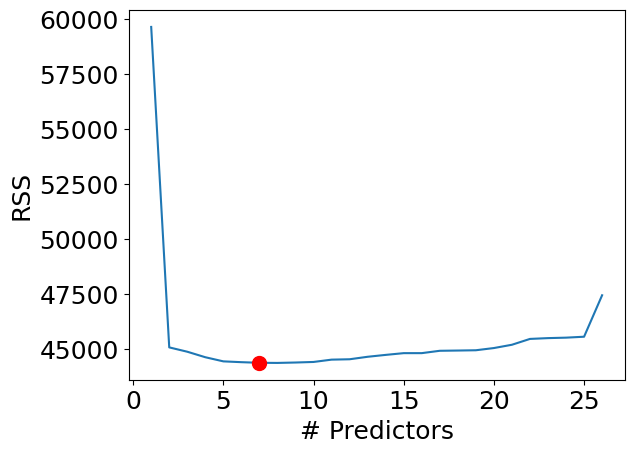

In [103]:
plt.plot(models_train["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')
plt.plot(models_train["RSS"].argmin(), models_train["RSS"].min(), "or")

In [104]:
models_test = pd.DataFrame(columns=["RSS", "model"])

predictors = []

for i in range(1,11):    
    models_test.loc[i] = forward(predictors, X[test], y[test]["UPDRS score"], X[test], y[test]["UPDRS score"])
    predictors = models_test.loc[i]["model"].model.exog_names

In [105]:
print(models_train.loc[10, "model"].model.exog_names)
print(models_test.loc[10, "model"].model.exog_names)

['Degree of voice breaks', 'Number of voice breaks', 'Number of periods', 'Number of pulses', 'Standard deviation of period', 'Minimum pitch', 'Fraction of locally unvoiced frames', 'Shimmer (local, dB)', 'Subject id', 'NTH']
['Degree of voice breaks', 'Number of voice breaks', 'Number of periods', 'Number of pulses', 'Mean period', 'Standard deviation of period', 'Median pitch', 'AC', 'Subject id', 'Standard deviation']


### model selection using Cross-validation